# Notes

* Bayesian inference is distinguished by broad view of probability, not by use of Bayes' theorem.
* Probability problem can be rephrased using natural frequencies (1 in 1000, 30 in 100 etc). Humans find seems to find these easier to understand.
* Can be exploited in B. inf. like this: take posterior distribution. Sample. Can now express statements about posterior in natural frequencies :)
* This chapter: teach working with samples from posterior
* Not necessary for globe tossing problem as posterior is simple, but good groundwork for future. Teaches concepts
* Often samples easier to work with than probability distributions. Better intuitions, easier data summary as opposed to difficult integrals
* Many methods for computing posterior only produce samples
* Rethinking: Why statistics can't save bad science. Statistical tests give imperfect cues about whether given hypothesis is true, has false positive rate. Furthermore, base rate at which hypotheses are actually true probably very low (though in practice unknown). Even for tests with good power and low false positive rate, taking into account very low base rate yields low Pr(true hypothesis | positive test). Only real way to increase this is to increase base rate. Increasing base rate requires thinking, not statistics

## 3.1. sampling from a grid-approximate posterior

* calc posterior prob for each point on grid
* then sample parameter values in accordance with the calculated posterior probabilities
* can summarize + visualize samples through histogram

## 3.2. sampling to summarize

* Work of model = produce posterior distribution
* My work: summarize and interpet posterior distribution
* Some commonly asked questions, look at each of them in next sections

### 3.2.1. intervals of defined boundaries

* how much posterior probability lies below some param value? between two param values?
* ex: how much post prob that proportion of water is < 0.5?
* answer: fraction of samples < 0.5
* ex: how much post prob for proportion of water between 0.5 and 0.75?
* answer: fraction of samples for which proportion between 0.5 and 0.75

### 3.2.2. intervals of defined mass

* interval of defined mass usually known as ***confidence interval***
* interval of posterior probablity may instead be called ***credible interval***
* terms used interchangeably. lots of confusion.
* report two param values A and B which between them contain P% of posterior mass
* ex: lower 80% of poster prob
* ans: starts at param val 0, ends at 80th percentile of samples
* ex: middle 80% interval
* ans: between 10% and 90% percentile
* such intervals give equal mass to each tail. known as ***percentile intervals (PI)***
* good for describing shape of distribution if distribution is not skewed
* for skewed distributions these intervals can be misleading, e.g. by omitting most likely value
* ***central task of all of these methods: describe shape of posterior distribution***
* problem above can be avoided using ***Highest Posterior Density Interval (HPDI)***
* HDPI = narrowest interval containing specified prob mass
* reasoning: infite nr of intervals with specified prob mass. but best description of post prob given by param values which are most consistent with data. get these by taking denses of all possible intervals. this is HDPI
* HDPI often similar to PI. more compuationally expensive. more simulation variance.
* *** if choice of interval type makes big difference: don't use interval to summarize post prob. whole post prob is result of B. inference. summarizes relative plausibility of each param value. intervals just helpful to summarize. if not helpful plot whole post prob. ***
* ***Rethinking: Why 95%?*** Fisher uses it out of convenience, later advised against it. Now in use due to tradition, not merit. Tradition/convenience not good reason to do something. But what else to use? No consensus, but think about what you want to do. If you say some value is outside of a given interval: give wides array that does not contain value. If you want to communicate shape of distribution: consider nested intervals
* ***Rethinking: What do confidence intervals mean?*** common interpretation: 95% CI = 95% prob that true param value in this interval. In strict non-Bayes. never correct because cannot use probability to measure uncertainty about parameters. Instead strict interpretation: if we repeated experiment very many times and made CI intervals very many times then 95% of computed intervals would contain true param value. Very confusing, often people slip into Bayes. interpretation. However, much ***larger point: 95% CI does not contain true value 95% of time***. Reason: 95% confidence is ***coming from model. Small-world number. Dont' know how it actually is in real/large world***. It's what the model believes, but one can believe something else. Nevertheless. CI can be useful in practice.

### 3.2.3. point estimates

* given entire post prob., what value to report?
* tricky, as b. estimate is entire post prob
* ***most important thing to note: you don't have to choose a point estimate, hardly ever necessary***
* ***Maximum A Posteriori (MAP)***: value with highest post prob
* also common: mean and median values
* how to choose between these? ***Loss Function***
* loss function = rule that tells you cost associated with using any particular point estimate
* ***different loss functions imply different point estimates***
* use poster value that minimizes expected loss, arg_min_{param_val} i.e. E[loss(param_val)] = E[ loss(param_val) * post_prob(param_val) ] (formulas not from book but from me, handful of salt)
* loss function comes from specific applied context
* in science: decision would be whether to accept/reject hypothesis. however, unclear what costs/benefits in terms of lost/gained knowledge are. better: report full posterior, so that future work can build on full estimate including uncertainty

## 3.3. sampling to simulate prediction

* At least four additional use-cass for sampling from posterior: model checking, software validation, research design, and forecasting
* This section: how to produce simulated observations how to perform some model checks

### 3.3.1. dummy data

* lhood function works both ways: given data and parameters gives lhood of these data. given only parameters gives probability distribution over possible data
* data sampled from likelihood given parameters called ***dummy data***, it's not observed
* for globe-tossing, lhood is binomial distribution. can be sampled by defining number of experiments and propability of positive outcome
* ***rethinking: sampling distributions*** Simulated observations = sampling distributions. Foundation for common non-Bayesian statistics. There, inference about parameters through sampling distribution. Here, in this book, inference about parameters not done directly through sampling distribution. Posterior deduced, then samples can be drawn [note: is this true? often samples only thing we have about posterior, e.g. when doing inference through MCMC]. Important: sampling is mathematical device, not actualy physical sampling. Produces small world/model internal numbers.

### 3.3.2. model checking

* Model checking = 1) model fitting worked well, 2) model is adequate for some purpose
* Can use model's empirical expectations = simulated data and estimated parameters to do this
* did the software work? compare simulated data to real data that was used to fit model. certain mismatch to be expected, but can help to catch silly mistakes
* is model adequate? all models false. assess exactly how model fails to describe data. use this to understand, revise and improve model
* what's adequate? decision of analyst and colleagues, varies by application
* use full posterior to simulate observations. use uncertainty contained in posterior. be aware of two levels of uncertainty of model predictions: observation uncertainty. even if probability of water is known with certainty, generated data is not certain. secondly, uncertainty about p. embodied by posterior over p. Because of this uncertainty about everything depending on p. This uncertainty will interact w/ sampling variation.
* Propagate parameter uncertainty by averaging over posterior. For each value of p there's implied distribution over data. Create this distribution for each value of p, then average all of those together using posterior probability of p. This yields ***posterior predictive distribution***
* Using full uncertainty instead of point estimate of parameter reduces overconfidence in model predictions. Distribution over data will likely be less peaked
* Extra check. Example: investigate nr of switches between land/water and also longest run of water or land in simulated vs true data. Just a different view on same data. Can highlight more ways in which model fails or fits well. Application-specific decision whether that is an issue or not
* ***rethinking: what does more extreme mean?*** Common check: count tail area that includes observed and more extreme data. Example of this: p-values. However: very weak check. View data in exactly the same way model expects it to. Alternative approaches to defining 'extreme' (e.g. longest land/water streak, nr of switches, ...) more challenging to model. Can more easily embarass model. In the end: model fitting is objective. Model checking is inherently subjective. Needs specific subjective domain knowledge (= expertise) to ask the right questions and understand well.

## 3.4. summary

* introduced basic procedures for manipulating posterior distributions
* fundamental tool: sample of parameters form posterior
* transforms problems from calculus to data summary
* samples can be used to produce intervals, point estimates, posterior predictive checks and other simulations
* posterior predictive check combine uncertainty about parameter (through posterior ) with uncertainty about outcomes (through likelihood). useful for model checking
* if models grow more comples posterior predictive simulations grow more important, for example for even understand a model

# 3.5. practice

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def grid_approx_posterior(n_water, n_tosses):
    
    p_grid = np.linspace(0, 1, 1000)
    prior = np.ones(1000)
    likelihood = stats.binom.pmf(n_water, n_tosses, p_grid)
    posterior = likelihood * prior
    posterior = posterior / np.sum(posterior)
    
    return p_grid, posterior

In [3]:
p_grid, posterior = grid_approx_posterior(6, 9)
np.random.seed(42)
samples = np.random.choice(p_grid, size=10000, p=posterior)

In [4]:
samples.mean()

0.63370010010010014

In [5]:
samples.max()

0.963963963963964

In [6]:
samples.min()

0.1041041041041041

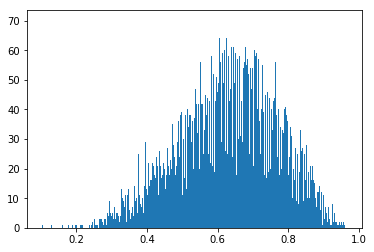

In [7]:
plt.hist(samples, bins=500);

### 3E1.

In [8]:
# post prob < 0.2?
1.0 * len(samples[samples < .2]) / len(samples)

0.0014

### 3E2.

In [9]:
# post prob > .8
float(len(samples[samples > .8])) / len(samples)

0.1148

### 3E3.

In [10]:
# post prob between .2 and .8?
1.0 * len(samples[(samples >= .2) & (samples <= .8)]) / len(samples)

0.8838

### 3E4.

In [11]:
# 20% of prob below which value?
np.percentile(samples, 20)

0.51451451451451446

### 3E5.

In [12]:
# 20% of posterior above which value?
np.percentile(samples, 80)

0.75875875875875876

### 3E6.

In [13]:
# narrowest interval w/ 66% of post prob?
# need to compute  Highest Posterior Density Interval (HPDI)
# can't use R function for this, implement my own
# logic: numerical approach. analytical might be possible for some posteriors but seems much more complicated
# enumerate all possible intervals w/ 66% post prob, pick smallest
# there are infinitely many. use approximate solution by sliding 66% window in 1% steps, picking smallest interval

def hdpi(samples, density):
    # percentile takes arguments in [0, 100] range, so operate on that scale
    density = 66.
    step_size = 1.

    # arange returns values from half-open interval [start, stop), so need to add step_size to stop to include it
    upper_thresholds = np.arange(density, 100.0 + step_size, step_size)
    lower_thresholds = upper_thresholds - density

    upper_percentiles = np.percentile(samples, upper_thresholds)
    lower_percentiles = np.percentile(samples, lower_thresholds)

    distances = upper_percentiles - lower_percentiles

    min_dist_ix = np.argmin(distances)

    #(lower_thresholds[min_dist_ix], upper_thresholds[min_dist_ix])
    return (lower_percentiles[min_dist_ix], upper_percentiles[min_dist_ix])

In [14]:
hdpi(samples, 66.)

(0.51451451451451446, 0.78692692692692634)

### 3E7.

In [16]:
# interval w/ 66% post prob assuming evenly-sized tails?
# 66% leaves 17% below and 17% above
np.percentile(samples, [17, 83])

array([ 0.4964965 ,  0.77077077])

### 3M1.

In [17]:
# grid approx posterior for 8 water, 15 tosses
p_grid_m1, posterior_m1 = grid_approx_posterior(8, 15)

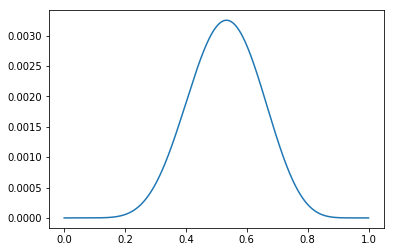

In [18]:
plt.plot(p_grid_m1, posterior_m1);

### 3M2.

In [19]:
# draw 10k samples, calculate 90% hdpi
np.random.seed(42)
samples_m1 = np.random.choice(p_grid_m1, size=10000, p=posterior_m1)

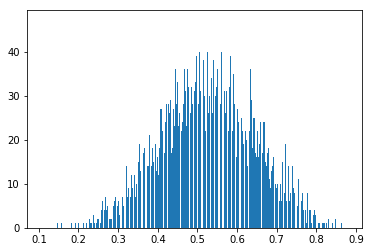

In [20]:
plt.hist(samples_m1, bins=len(p_grid_m1));

In [21]:
hdpi(samples_m1, 90.)

(0.41241241241241233, 0.64164164164164161)

### 3M3.

In [22]:
# construct posterior predictive check: simulate distribution of samples, average of posterior uncertainty in p
# what's the probability of 8 water in 15 tosses?

# create lhood function for each value of p. this function yields distribution over n_water in 15 tosses. 
# for each value of p: make lhood. sample n_water from lhood.
# combine samples
# each set of samples, one per lhood, has values of n_water according to frequency of lhood
# each lhood Pr(n_water | p, n_tosses) appears in proportion to how often its value of p appears in posterior samples
# so sum total of all samples automatically weighted by posterior

In [34]:
# i have not found a function to generate random samples from a binomial which can
# a) do this for a range of possible values for p, while simultaneously b) generate multiple samples
# for each p value. both stats.binom.rvs and np.random.binomial seem to be able to only either do a) or b)
# but not both. so i have to loop in python :(

n_binom_sample_per_p = 1

dummy_data = np.zeros((len(samples_m1), n_binom_sample_per_p), dtype=int)

In [35]:
# output: ndarray (nr posterior samples of p) x (nr of binomial samples per value of p)
for ix, p in enumerate(samples_m1):
    dummy_data[ix,:] = stats.binom.rvs(15, p, size=n_binom_sample_per_p)

In [36]:
dummy_data_1d = dummy_data.ravel()

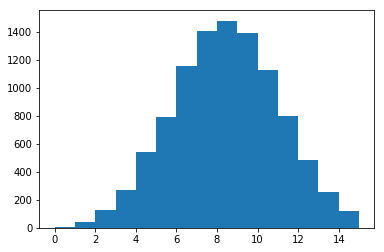

In [37]:
plt.hist(dummy_data_1d, bins=15);

In [38]:
# chance of seeing 8 water in 15 throws?
1.0 * dummy_data[dummy_data == 8].size / dummy_data.size

0.1478

### 3M4.

In [ ]:
# Make postrior from dummy data sampled in previous exercise. 
# Then from that calculate probability to observe 6 water in 9 tosses

# solve by : using dummy_data as data for Pr(p | data). Change grid approx code to accept ndarray
# of data instead of single value
# then sample posterior as usual and make new dummy data from this, then estimate chance

In [59]:
def grid_approx_posterior(n_water, n_tosses):
    
    p_grid = np.linspace(0, 1, 1000)
    prior = np.ones(1000)
    likelihood = stats.binom.pmf(n_water, n_tosses, p_grid)
    posterior = likelihood * prior
    posterior = posterior / np.sum(posterior)
    
    return p_grid, posterior

In [60]:
n_tosses = 15

[grid_approx_posterior(n_water, n_tosses) for n_water in dummy_data_1d[:10]]

[(array([ 0.        ,  0.001001  ,  0.002002  ,  0.003003  ,  0.004004  ,
          0.00500501,  0.00600601,  0.00700701,  0.00800801,  0.00900901,
          0.01001001,  0.01101101,  0.01201201,  0.01301301,  0.01401401,
          0.01501502,  0.01601602,  0.01701702,  0.01801802,  0.01901902,
          0.02002002,  0.02102102,  0.02202202,  0.02302302,  0.02402402,
          0.02502503,  0.02602603,  0.02702703,  0.02802803,  0.02902903,
          0.03003003,  0.03103103,  0.03203203,  0.03303303,  0.03403403,
          0.03503504,  0.03603604,  0.03703704,  0.03803804,  0.03903904,
          0.04004004,  0.04104104,  0.04204204,  0.04304304,  0.04404404,
          0.04504505,  0.04604605,  0.04704705,  0.04804805,  0.04904905,
          0.05005005,  0.05105105,  0.05205205,  0.05305305,  0.05405405,
          0.05505506,  0.05605606,  0.05705706,  0.05805806,  0.05905906,
          0.06006006,  0.06106106,  0.06206206,  0.06306306,  0.06406406,
          0.06506507,  0.06606607,  0.

In [74]:
n_tosses = 15

In [70]:
p_grid = np.linspace(0, 1, 1000)

In [79]:
prior_grid = np.ones_like(p_grid)

In [90]:
p = p_grid[100]
prior = prior_grid[100]

In [94]:
likelihood_per_datum = stats.binom.pmf(dummy_data_1d, n_tosses, p)

In [99]:
likelihood_per_datum.min()

1.0151206830716665e-15

In [100]:
np.prod(likelihood_per_datum)

0.0

In [101]:
# numerical problems :(

In [104]:
np.sum(np.log(likelihood_per_datum))

-111010.33086217266

In [111]:
unstd_log_posterior = np.zeros(p_grid.size)

In [112]:
for (ix, (p, prior)) in enumerate(zip(p_grid, posterior)):
    likelihood_per_datum = stats.binom.pmf(dummy_data_1d, n_tosses, p)
    unstd_log_posterior[ix] = np.sum(np.log(likelihood_per_datum))

/opt/blue-python/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


In [119]:
# contains inf and -inf if likelihood is 0, screw up sum

In [127]:
unstd_log_posterior

array([      0.        , -468512.86352557, -413661.59488605,
       -381605.17412985, -358881.48132049, -341271.634249  ,
       -326896.43035623, -314753.44583602, -304244.3230666 ,
       -294983.10916511, -286706.27825905, -279225.86811159,
       -272403.0943974 , -266132.56280555, -260332.34870518,
       -254937.50765693, -249895.68459699, -245164.05649644,
       -240707.15023313, -236495.25123597, -232503.22079112,
       -228709.60220468, -225095.93509102, -221646.22221218,
       -218346.50987133, -215184.55402026, -212149.55189199,
       -209231.92430892, -206423.13760007, -203715.55678222,
       -201102.32364125, -198577.25481185, -196134.75604398,
       -193769.7496659 , -191477.61287884, -189254.12499848,
       -187095.42213048, -184997.95805729, -182958.47034202,
       -180973.95083609, -179041.61992125, -177158.90393276,
       -175323.4153034 , -173532.93504421, -171785.39723955,
       -170078.87528467, -168411.56963608, -166781.7968794 ,
       -165187.97994822,

In [116]:
unstd_log_posterior[unstd_log_posterior == -np.infty] = 0.0

In [120]:
posterior = unstd_log_posterior/np.sum(unstd_log_posterior)

In [123]:
posterior.sum()

0.99999999999999978

In [122]:
posterior.size

1000

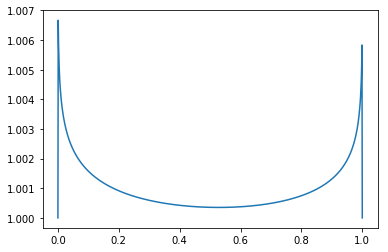

In [125]:
plt.plot(p_grid, np.exp(posterior))

In [126]:
posterior

array([-0.        ,  0.00664273,  0.00586503,  0.00541053,  0.00508834,
        0.00483866,  0.00463485,  0.00446268,  0.00431368,  0.00418237,
        0.00406502,  0.00395896,  0.00386222,  0.00377332,  0.00369108,
        0.00361459,  0.0035431 ,  0.00347602,  0.00341283,  0.00335311,
        0.00329651,  0.00324272,  0.00319149,  0.00314257,  0.00309579,
        0.00305096,  0.00300793,  0.00296656,  0.00292674,  0.00288835,
        0.0028513 ,  0.00281549,  0.00278086,  0.00274733,  0.00271483,
        0.00268331,  0.0026527 ,  0.00262296,  0.00259405,  0.00256591,
        0.00253851,  0.00251182,  0.00248579,  0.00246041,  0.00243563,
        0.00241143,  0.0023878 ,  0.00236469,  0.00234209,  0.00231998,
        0.00229834,  0.00227715,  0.0022564 ,  0.00223606,  0.00221612,
        0.00219657,  0.00217739,  0.00215857,  0.0021401 ,  0.00212196,
        0.00210414,  0.00208664,  0.00206945,  0.00205254,  0.00203592,
        0.00201958,  0.0020035 ,  0.00198768,  0.00197212,  0.00

In [128]:
n_water = dummy_data_1d
n_tosses = 15

p_grid = np.linspace(0, 1, 1000)
prior = np.ones(1000)

likelihood = np.zeros((n_water.size, p_grid.size))

for ix, water_count in enumerate(n_water):
    likelihood[ix, :] = stats.binom.pmf(water_count, n_tosses, p_grid)

In [47]:
# logic: likelihood ndarray has one row per observation, one column per possible value of p_grid
# we want want to operate by p value: multiply likelihood of all independent observations to get
# total likelihood. all of these are in one column per value of p, so multiply on axis 0
likelihood = likelihood.prod(axis=0)

In [50]:
likelihood

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [49]:
# then multiply this with the prior
unstd_posterior = likelihood * prior
posterior = unstd_posterior / np.sum(unstd_posterior)

/opt/blue-python/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


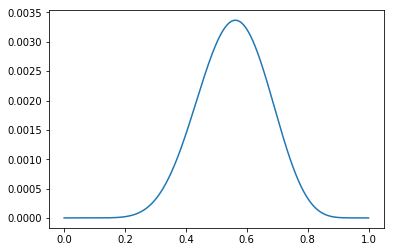

In [41]:
plt.plot(p_grid, posterior);

In [138]:
n = 15
k1 = 8
k2 = 9
p = .5

In [143]:
stats.binom.pmf(k1, n, p) * stats.binom.pmf(k2, n, p)

0.029995269142091472

In [141]:
stats.binom.pmf(k1+k2, 2*n, p)

0.11153505183756332